# NASDAQ 100 Stocks Predictor - Exploratory Data Analysis (EDA)

**Author:** Renish Kanjiyani <br>
**Notebook:** 2 - EDA <br>
**Date:** 05/11/2023 <br>
**E-mail:** kanjiyanirenish2@gmail.com

---

# Table of Contents:

---

## Introduction:

---

## EDA:

In [53]:
# Loading all the packages required

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')


In [54]:
# Loading the dataset 

stocks_df = pd.read_csv('../nasdaq_stocks_100.csv', sep='\t')

In [55]:
# Let's view our dataset 

stocks_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL
5,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,AAPL
6,2010-01-12,7.471071,7.491786,7.372143,7.418571,6.369709,594459600,AAPL
7,2010-01-13,7.423929,7.533214,7.289286,7.523214,6.459555,605892000,AAPL
8,2010-01-14,7.503929,7.516429,7.465000,7.479643,6.422143,432894000,AAPL
9,2010-01-15,7.533214,7.557143,7.352500,7.354643,6.314816,594067600,AAPL


In [56]:
# Let's check the shape of our dataframe 

stocks_df.shape

(271680, 8)

In [57]:
print(f"Our dataframe has {stocks_df.shape[0]} rows and {stocks_df.shape[1]} columns")

Our dataframe has 271680 rows and 8 columns


In [58]:
# Let's view more information on our dataframe 

stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271680 entries, 0 to 271679
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       271680 non-null  object 
 1   Open       271680 non-null  float64
 2   High       271680 non-null  float64
 3   Low        271680 non-null  float64
 4   Close      271680 non-null  float64
 5   Adj Close  271680 non-null  float64
 6   Volume     271680 non-null  int64  
 7   Name       271680 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 16.6+ MB


**Observations:** 
- We imported our clean dataset and we can perform our EDA on it. 

### Converting the `Date` column to a `datetime` format

In [59]:
# Let's convert the column now 

stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

In [60]:
# Sanity Check 
stocks_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Name                 object
dtype: object

- We successfully converted the `date` column to `datetime` column. 

### Exploring the `Name` column:

In [61]:
# Let's take a look at how many unique values we have in our name column

stocks_df['Name'].unique()

array(['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD',
       'AMGN', 'AMZN', 'ANSS', 'ASML', 'ATVI', 'AVGO', 'BIDU', 'BIIB',
       'BKNG', 'CDNS', 'CDW', 'CERN', 'CHKP', 'CHTR', 'CMCSA', 'COST',
       'CPRT', 'CRWD', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'DLTR', 'DOCU',
       'DXCM', 'EA', 'EBAY', 'EXC', 'FAST', 'FB', 'FISV', 'FOX', 'FOXA',
       'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INCY', 'INTC',
       'INTU', 'ISRG', 'JD', 'KDP', 'KHC', 'KLAC', 'LRCX', 'LULU', 'MAR',
       'MCHP', 'MDLZ', 'MELI', 'MNST', 'MRNA', 'MRVL', 'MSFT', 'MTCH',
       'MU', 'NFLX', 'NTES', 'NVDA', 'NXPI', 'OKTA', 'ORLY', 'PAYX',
       'PCAR', 'PDD', 'PEP', 'PTON', 'PYPL', 'QCOM', 'REGN', 'ROST',
       'SBUX', 'SGEN', 'SIRI', 'SNPS', 'SPLK', 'SWKS', 'TCOM', 'TEAM',
       'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRSN', 'VRTX', 'WBA', 'WDAY',
       'XEL', 'XLNX', 'ZM'], dtype=object)

In [62]:
stocks_df['Name'].value_counts().nunique


<bound method IndexOpsMixin.nunique of AAPL    2943
NVDA    2943
NFLX    2943
MU      2943
MTCH    2943
        ... 
FOXA     632
FOX      631
ZM       605
CRWD     568
PTON     494
Name: Name, Length: 102, dtype: int64>

**Observations:** 
- We can see that certain stocks such as `AAPL (APPLE)` have `2943` unique values counts whereas the others such as `FOX` only have `631`. 

- Therefore, what we can do is look at the top 10 constituents of the NASDAQ 100 Index. 

<b>The top 10 constitunets of the NASDAQ 100 Index are: </b> <br>

`AAPL` (Apple), `MSFT` (Microsoft), `GOOG` (Google Class C), `GOOGL` (Google Class A), `AMZN` (Amazon), `TSLA` (Tesla), `FB` (Facebook/Meta), `NVDA` (Nvidia), `PEP` (Pepsi), `COST` (Costco).


<b>Breakdown of the top 10 constituents:</b>

Now that we have indentified our top 10 constituents, it is not practically possible to conduct analysis on every individual stock. Therefore, what we can do is group certain stocks and then perform further analysis on it. 

We can group the following individual stocks: `AAPL`, `MSFT`, `GOOG`, `GOOGL`, `AMZN` and `FB`. As per the stocks we grouped, it can be named as the `tech_giants`.

The assumption we are making behind this is that as the stock prices of the `tech_giants` company changes, this will directly correlate to other stocks in the index as the giants are controlling the majority of the market share. Therefore, it is safe to assume that performing analysis on these will give us an idea of how all the different stocks behave in the `NASDAQ-100` index. 

### Grouping Stocks

Let's create a new dataframe that will consist of the following stocks: 

`AAPL`, `MSFT`, `GOOG`, `GOOGL`, `AMZN` & `FB` <-- We will name the following as `tech_giants`.

In [63]:
# Creating the dataframe

tech_giants = stocks_df[stocks_df['Name'].isin(['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'FB'])]


In [64]:
# Sanity Check 

tech_giants.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
116557,2012-04-24,298.003021,302.182343,297.544739,299.512360,299.512360,3872661,GOOG
31167,2016-11-25,786.500000,786.750000,777.900024,780.369995,780.369995,1837100,AMZN
1948,2017-09-28,38.472500,38.570000,38.174999,38.320000,36.571980,88022000,AAPL
29792,2011-06-10,189.250000,190.770004,186.279999,186.529999,186.529999,3760400,AMZN
106653,2013-01-24,31.270000,31.490000,30.809999,31.080000,31.080000,43845100,FB
177621,2016-06-30,50.720001,51.299999,50.500000,51.169998,47.050705,28527800,MSFT
178824,2021-04-13,257.260010,259.190002,256.829987,258.489990,257.401733,23837500,MSFT
106949,2014-03-28,61.340000,61.950001,59.340000,60.009998,60.009998,67052000,FB
178555,2020-03-18,138.000000,146.000000,135.020004,140.399994,138.402435,81593200,MSFT
178295,2019-03-07,111.400002,111.550003,109.870003,110.389999,107.398460,25339000,MSFT


In [65]:
# Checking the shape of the new dataframe 

tech_giants.shape

(17059, 8)

In [66]:
print(f"Our new dataframe tech_giants has {tech_giants.shape[0]} rows and {tech_giants.shape[1]} columns. ")

Our new dataframe tech_giants has 17059 rows and 8 columns. 


In [67]:
# Check the unique names in the Name column

tech_giants['Name'].unique()

array(['AAPL', 'AMZN', 'FB', 'GOOG', 'GOOGL', 'MSFT'], dtype=object)

**Observations:**

- We were able to successfully create a new dataframe that contains the top 10 stocks in the NASDAQ 100 index. 

- Now, that we grouped them as one and are making our explorations based on a whole group as `tech_giants`, we can actually go ahead and drop the `Name` column as it will not be necessary now. 

In [68]:
# Let's drop the name column as we are making explorations based on the grouping 

tech_giants = tech_giants.drop(['Name'], axis=1)

In [69]:
# Sanity Check 

tech_giants.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
119937,2014-01-21,581.046021,582.582581,576.226196,582.432434,582.432434,3955840
119401,2011-11-30,299.274261,300.055054,296.341339,299.994995,299.994995,6787206
966,2013-11-04,18.610714,18.815001,18.528929,18.812500,16.608582,244627600
657,2012-08-10,22.096786,22.205713,22.096430,22.203571,19.146202,194938800
118827,2021-05-03,2402.719971,2419.699951,2384.500000,2395.169922,2395.169922,1689400


In [70]:
# Let's check the new shape 

tech_giants.shape

(17059, 7)

In [71]:
# print the number of columns and rows 

print(f"Our dataframe now has {tech_giants.shape[0]} rows and {tech_giants.shape[1]} columns.")

Our dataframe now has 17059 rows and 7 columns.


**Observations:**

- We were able drop the `Name` column as we grouped the stocks together.

- The new dataframe `tech_giants` will now be used for further explorations and modelling. 

### Distribution of our columns:

Let's look at how our data is distributed across the different columns. 

In [72]:
# Let's look at the datatypes of our columns

tech_giants.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

**Observations:**
- Looking at the data types above, we can see that we only have numeric columns. 

- We will be creating a variable that contains all our numeric columns and then visualize the distribution using `histograms`. 

In [73]:
# Creating the numeric columns variable 

numeric_df = tech_giants.select_dtypes(['int', 'float']).copy()

In [74]:
# Sanity Check 

numeric_df

,Open,High,Low,Close,Adj Close,Volume
0,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
1,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
3,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
4,7.510714,7.571429,7.466429,7.570714,6.500339,447610800
...,...,...,...,...,...,...
178925,300.989990,302.600006,300.260010,301.140015,301.140015,14747900
178926,301.010010,301.089996,298.200012,300.179993,300.179993,17180400
178927,299.779999,300.609985,297.470001,300.209991,300.209991,15046800
178928,300.820007,302.140015,297.000000,297.250000,297.250000,19927000


From the table above we can see all the columns with the datatypes `int` and `float`. We excluded the `date` column as it not relevant at the moment. 

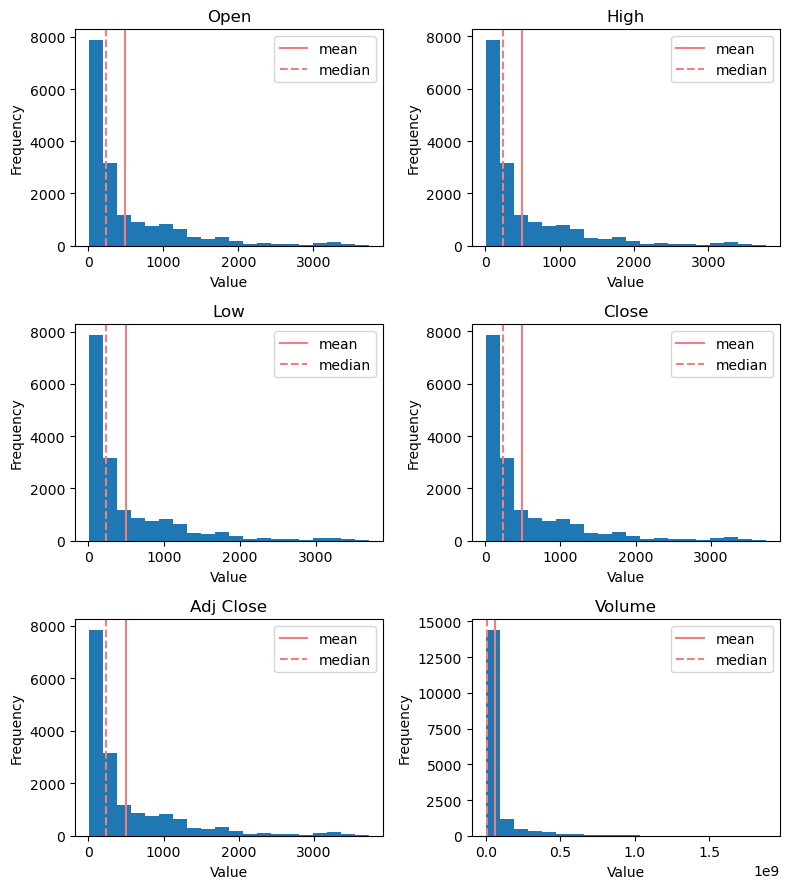

In [75]:
# Let's plot the visualizations 

num_cols = len(numeric_df.columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows based on the number of columns

# Intializing the plots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 3*num_rows))

# Running for loop across all the numeric columns
for i, column in enumerate(numeric_df.columns):
    row = i // 2  # Calculate the row index for the subplot
    col = i % 2   # Calculate the column index for the subplot
    ax = axes[row, col]  # Get the current subplot axes
    ax.hist(numeric_df[column], bins=20)
    ax.axvline(numeric_df[column].mean(), c="lightcoral", label="mean")
    ax.axvline(numeric_df[column].median(), c="lightcoral", label="median", linestyle="--")
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    axes[-1, -1].remove()

plt.tight_layout()
plt.show()

**Observations:**
- From the visualizations above we can see that the `mean` value is approximately in the range of `400-600`. This is because our new dataframe has information on various stocks. 

- Some of the individual stocks have larger values compared to the others and therefore this is affecting our mean.

- Our histograms are all `right-skewed` or in other words `positive-skewed`, this is evident through the long right tail. This occurs as there is a limit on the minimum possible value while there is no limit on the maximum possible value.

- In the following scenario, as it is `right-skewed` our `median` will always appear before the `mean`. 

- We can also see that the histogram for the `Volume` column is not shown appropriately as these values are extremely large and we would require a `log` scale to see the distribution appropriately. We will not be converting it into a `log` scale graph as we will not be using it for modeling. 

### Evaluating Trading Strategies:

There are numerous factors that can be considered when analyzing stocks data. In the following scenario we have the given features `Date`, `Open`, `High`, `Low`, `Close`, `Adj Close` and `Volume`. 

A number of strategies can be applied when analyzing this data:
- An investor can trade based on the time of the day (When the stock is at `high` they can potentially sell, create more profit)
- They can trade based on the closing price of the day (Sell/Keep the stock based on the price it closes at)

In our scenario: 
- We will be looking at the closing price of the stock on that day and compare that to the previous day's closing price to determine whether the difference is positive or negative. This will be the most basic strategy that we will apply. 

Let's look at how our column `Close` varies over time `Date`. We can plot a simple line graph to see the trend of the closing stock price over the different years of data that we have access to. 

In [79]:
# Let's look at our desired columns 

tech_giants[['Date', 'Close']]

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714
...,...,...
178925,2021-09-03,301.140015
178926,2021-09-07,300.179993
178927,2021-09-08,300.209991
178928,2021-09-09,297.250000


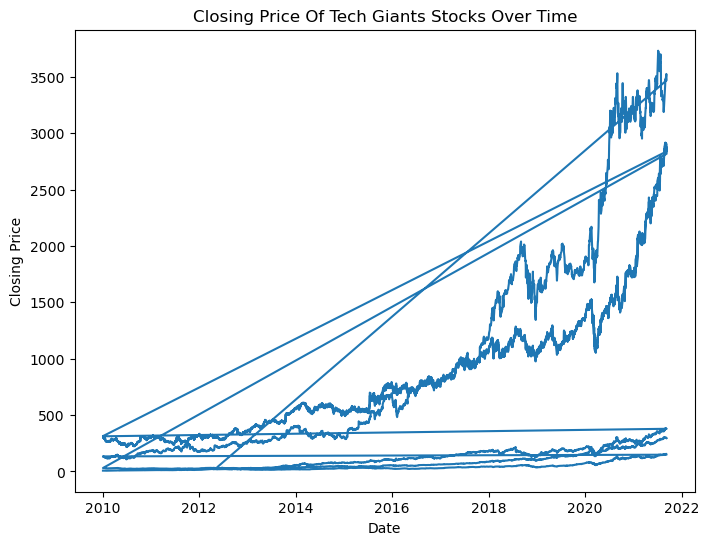

In [82]:
# Plotting a line graph representing the table above (Date and Closing Price columns)

plt.figure(figsize=(8, 6))
plt.plot(tech_giants['Date'], tech_giants['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price of tech giants stocks over time'.title())
plt.show()

**Observations:**
- Looking at the graph we can see numerous data points being plotted. This is because, our dataframe consists of 6 different stocks and each stock has its own 
closing price at a given day. 

- Therefore, we cannot use the following to make predictions as we do not have clear data points that we can plot.

- Let's validate the information mentioned above by selecting a random date and looking at the data points. 

In [81]:
# Selecting a random date and looking at the data respectively

tech_giants[tech_giants['Date'] == '2021-09-03']

,Date,Open,High,Low,Close,Adj Close,Volume
2938,2021-09-03,153.759995,154.630005,153.089996,154.300003,154.300003,57808700
32368,2021-09-03,3452.000000,3482.669922,3436.439941,3478.050049,3478.050049,2575700
108822,2021-09-03,374.750000,377.160004,373.109985,376.260010,376.260010,7509600
118914,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
121857,2021-09-03,2861.610107,2883.100098,2848.010010,2874.790039,2874.790039,992500
178925,2021-09-03,300.989990,302.600006,300.260010,301.140015,301.140015,14747900


- As we can see from the table we have 6 different data points for one particular day that we selected. Therefore, it is not possible to predict as we will not obtain clear results.

- Our next step would be to narrow down to one particular stock and use that stock as a reference point for the NASDAQ-100 index.

### NASADAQ-100 Stock Reference (APPLE):

When evaluting our trading strategies we looked at how the data varied for the group of stocks `tech_giants` we created. Our desired trading strategy was to look at the difference between the closing price of the present day minus the closing price of yesterday. We then tried to plot the closing price of the group vs the date (over the years). We were not able to see a clear visual because we have 6 different stock closing price on a given day.

- Our next step is to select a reference point in the NASDAQ-100 index that could potentially represent the movement of the other stocks. 

- We decided to go with the stock information on `AAPL` which is `APPLE`. This is because, Apple has the highest market cap valued at `$2.067 T` compared to the other stocks within the index. 

- Therefore, it is safe to assume that doing analysis on the stock prices of `APPLE` will help us make predictions of other stocks as well within the index. 

In [ ]:
# Let's jump back to our original dataframe 

stocks_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


In [ ]:
# Let's filter the dataframe to only give us AAPL stocks 

aapl_stocks = stocks_df[stocks_df['Name'].isin(['AAPL'])]

In [ ]:
# Sanity Check

aapl_stocks.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
2908,2021-07-23,147.550003,148.720001,146.919998,148.559998,148.337753,71447400,AAPL
2261,2018-12-27,38.959999,39.192501,37.517502,39.037498,37.952026,212468400,AAPL
2618,2020-05-29,79.812500,80.287498,79.117500,79.485001,78.834900,153532400,AAPL
1803,2017-03-03,34.695000,34.957500,34.647499,34.945000,33.083912,84432400,AAPL
1976,2017-11-07,43.477501,43.812500,43.400002,43.702499,41.708946,97446000,AAPL


In [ ]:
# Checking the shape of our new dataframe 

aapl_stocks.shape

(2943, 8)

In [ ]:
# Printing rows and columns 

print(f"Our new aapl dataframe now has {aapl_stocks.shape[0]} rows and {aapl_stocks.shape[1]} columns.")

Our new aapl dataframe now has 2943 rows and 8 columns.


In [ ]:
# More information on our dataframe 

aapl_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2942
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2943 non-null   datetime64[ns]
 1   Open       2943 non-null   float64       
 2   High       2943 non-null   float64       
 3   Low        2943 non-null   float64       
 4   Close      2943 non-null   float64       
 5   Adj Close  2943 non-null   float64       
 6   Volume     2943 non-null   int64         
 7   Name       2943 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 206.9+ KB


- The table above shows us extended information on our new dataframe. We can go ahead and drop the `Name` column as all the data values belong to one particular stock which `AAPL`. 

In [ ]:
# Sanity Check to see unique names 

aapl_stocks['Name'].unique()

array(['AAPL'], dtype=object)

In [ ]:
# We checked for the unique names above and now we can go ahead and drop this column 

aapl_stocks = aapl_stocks.drop(['Name'], axis=1)

In [ ]:
# Sanity Check 

aapl_stocks.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1654,2016-07-29,26.047501,26.137501,25.920000,26.052500,24.301443,110934800
684,2012-09-19,25.009287,25.142500,24.984644,25.075001,21.622250,326874800
829,2013-04-22,14.022857,14.364286,13.973929,14.238214,12.405610,429920400
2377,2019-06-14,47.887501,48.397499,47.575001,48.185001,47.227264,75046000
49,2010-03-16,8.006429,8.035000,7.946786,8.016071,6.882730,446908000


Now that we dropped our `Name` column, let's go ahead and look at the distributions of all our columns before doing further analysis. 

In [ ]:
# Selecting datatypes that are int and float values 

aapl_numeric_df = aapl_stocks.select_dtypes(['int', 'float']).copy()

In [ ]:
# Sanity Check 

aapl_numeric_df.sample(5)

,Open,High,Low,Close,Adj Close,Volume
2374,48.715000,49.000000,48.400002,48.702499,47.734474,107731600
1696,28.422501,28.660000,28.357500,28.487499,26.716732,118564400
2931,149.809998,150.320007,147.800003,148.360001,148.360001,58991300
597,19.787500,19.888929,19.322857,19.502857,16.745470,560896000
1690,28.262501,28.530001,28.127501,28.392500,26.627634,138057200


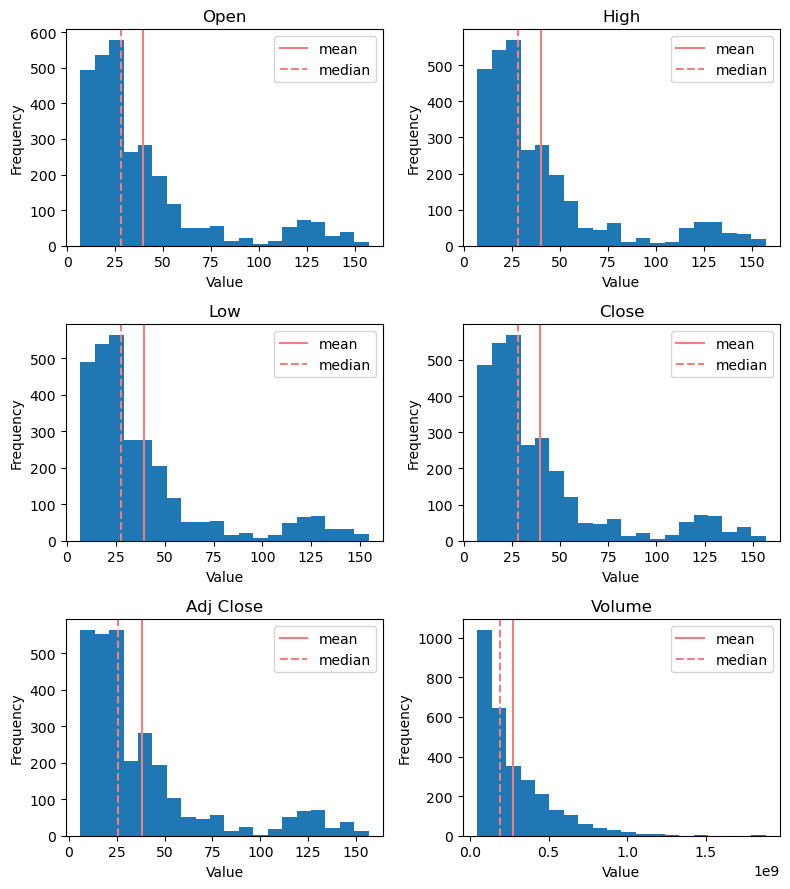

In [ ]:
# Let's look at the distributions of all our numeric columns 

num_cols = len(aapl_numeric_df.columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows based on the number of columns

# Intializing the plots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 3*num_rows))

# Running for loop across all the numeric columns
for i, column in enumerate(aapl_numeric_df.columns):
    row = i // 2  # Calculate the row index for the subplot
    col = i % 2   # Calculate the column index for the subplot
    ax = axes[row, col]  # Get the current subplot axes
    ax.hist(aapl_numeric_df[column], bins=20)
    ax.axvline(aapl_numeric_df[column].mean(), c="lightcoral", label="mean")
    ax.axvline(aapl_numeric_df[column].median(), c="lightcoral", label="median", linestyle="--")
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    axes[-1, -1].remove()

plt.tight_layout()
plt.show()

**Observations:**
- afj

### Applying Trading Strategy:

In the section above where we discussed the `Evaluting Trading Strategies` we looked at how using the closing price would help us determine whether the value of a stock was going up or down. 

- A better strategy to use would be to look at the `Adj Close` column. This is because, this column accounts for external factors that might affect the particular stock price and therefore gives a more realistic and reliable price. 

Let's plot the visuals of both columns `Close` and `Adj Close` against the `Date` and look at how the data is represented. 

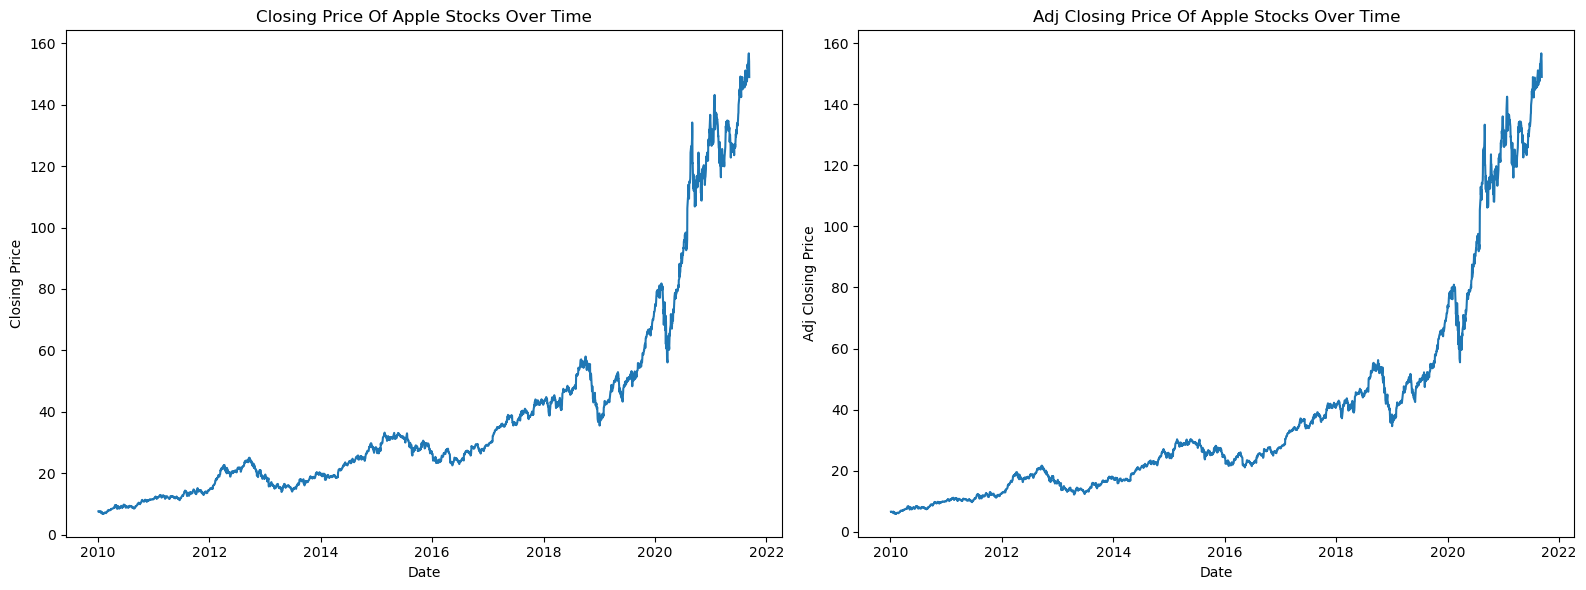

In [87]:
# Plotting both visuals side by side

# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Graph 1
axs[0].plot(aapl_stocks['Date'], aapl_stocks['Close'])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Closing Price')
axs[0].set_title('Closing Price of Apple stocks over time'.title())

# Graph 2
axs[1].plot(aapl_stocks['Date'], aapl_stocks['Adj Close'])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Adj Closing Price')
axs[1].set_title('Adj Closing Price of Apple stocks over time'.title())

plt.tight_layout()
plt.show()

**Observations:**
- afhif

---

## Conclusion: